The aim is to train a neural network that will classify newswires into different categories. For training the neural network, Reuters Newswire dataset is used. This dataset consists of short newswires from 46 different categories. There are 8982 train points and 2246 test points. Each class has atleast 10 samples.

This dataset is provided with the keras so, you can directly use it without downloading it separately.

Also note that this is a single-label, multiclass classification problem.

In [2]:
# import the dataset
from keras.datasets import reuters

# load the data using load_data()
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 15s 7us/step


Note that the argument num_words=10000 means that only top 10K, frequently occuring words from the dataset. The reason for picking only top 10K words is that, the vector size will not be very large.

The data is encoded as Numpy arrays. Let's look at the shape and length of these arrays.

In [3]:
print('The shape of the training data: ', train_data.shape)
print('The shape of the training labels: ', train_labels.shape)
print('The shape of the testing data: ', test_data.shape)
print('The shape of the testing labels: ', test_labels.shape)
print('The length of the training data: ', len(train_data))
print('The length of the training labels: ', len(train_labels))
print('The length of the testing data: ', len(test_data))
print('The length of the testing labels: ', len(test_labels))

The shape of the training data:  (8982,)
The shape of the training labels:  (8982,)
The shape of the testing data:  (2246,)
The shape of the testing labels:  (2246,)
The length of the training data:  8982
The length of the training labels:  8982
The length of the testing data:  2246
The length of the testing labels:  2246


It can be seen that the length of train_data is 8982 and the length of test_data is 2246. The length of train_labels and test_labels is also same as corresponding train and set datasets, which is obvious as each data point corresponds to a single label. Now, let's look at the contents of the label.

In [6]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

Since, the train_data and test_data contains the numbers, they can be converted back to sentences.

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 5s 9us/step


Here, word_index is a dictionary that stores the mappings of words with the numbers.
reverse_word_index stores the reverse dictionary.

decoded_review stores the review in english for train_data[0]. Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

Now let's first build our neural network (or the model) for this classification task. Then the above data will be fed to the model and lastly, the model will be tested on the test data to see if the model is correctly trained.

In [8]:
# import models and layers to define the model
from keras import models
from keras import layers

# sequential network is used
model = models.Sequential()

# add 3 layers
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

``` model = models.Sequential() ``` means that the model used is Sequential. Other types of models are also there. We will look into them in other tutorials.

``` model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) ``` means that the first layer that we have added is of type Dense and it contains 64 units. They are Densely connected (also known as fully connected layers). The activation function used is relu (Rectilinear unit). The shape of the input to this layer is of the form (10000,). The number 10000 is the input_shape because 10000 most frequent words are used only.

``` model.add(layers.Dense(64, activation='relu')) ``` means that the next layer that we have added is of type Dense and it contains 64 units. We are not required to add input_shape argument from second layer onwards, keras will understand the input_shape itself from the first layer's architecture.

```model.add(layers.Dense(46, activation='softmax')) ``` this is the final layer. The activation function used is softmax. Softmax function is used because with softmax the network will output probability distribution over 46 different classes. For every input. the network will output 46 dimentional vector.

Now, let's compile the model by using appropriate optimizer, loss function and evaluation metric.

In [9]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

The model is ready now. We'll just need to feed the data into the model. The list of integers cannot be fed into the model directly. Integers needs to be converted into tensors. One way is to pad each review so that all have the same length and then using embedding layer that can take these integers directly. But, let's do it in other way. One-hot encode (only one value in each row is 1 and rest are 0s) the data so that it is in the form of 0 and 1. This data can directly be fed into the first layer of the network.

In [10]:
import numpy as np

def vectorize_sequence(sequences, dimesion=10000): 
    # dimension=10000 because we have used 10000 words only while loading the data
    results = np.zeros((len(sequences), dimesion))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


Here, since there are 46 different labels. Let's also change it to one-hot seat form.

In [11]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

To see if the model is overfitting or not, let's keep a validation set of size 1K as well.

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Our data is ready, now let's train the model for 20 epochs. The fit function returns the history object which conatins a history dictionary. This dictionary conatins all the information of each epoch.

In [13]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

# values in the history dictionary
history_dict = history.history
print(history_dict.keys())

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 341us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 205us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 2s 229us/step - loss: 1.0952 - acc: 0.7650 - val_loss: 1.1709 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 2s 204us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0802 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 2s 225us/step - loss: 0.7034 - acc: 0.8473 - val_loss: 0.9844 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 2s 267us/step - loss: 0.5667 - acc: 0.8801 - val_loss: 0.9414 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 2s 241us/step - loss: 0.4583 - acc: 0.9050 - val_loss: 0.9080 - val_acc: 0.8020


To see the loss, validation loss, accuracy and validation accuracy we can use the history object. The plot can give us the better understanding about it. Let's use matplotlib to plot this data

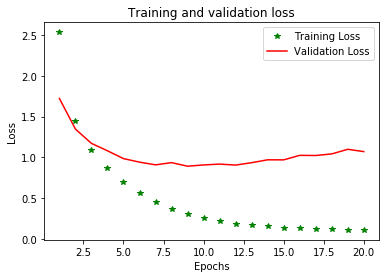

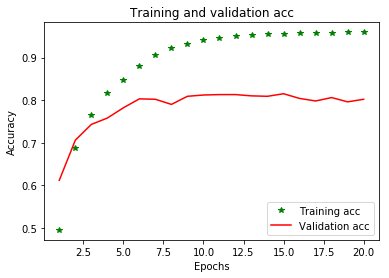

In [14]:
import matplotlib.pyplot as plt

# following line contains a 'magic function' to plot figures on jupyter notebooks
%matplotlib inline 

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.figure(0)
plt.plot(epochs, loss_values, 'g*', label='Training Loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(epochs, acc_values, 'g*', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Accuracy should increase and loss should decrease after every iteration which can be clearly observed in training loss and training accuracy. In case of validation accuracy and validation loss, it is not following the above thing. So, we can clearly say that this model overfits. It can be observed that the model overfits by looking at the graph by observing the the validation loss increases after 9 epochs (we are overtraining). So, now let's run the model only for 9 epochs.

In [16]:
model.fit(x_train, one_hot_train_labels, epochs=9, batch_size=512)

Epoch 1/9
8982/8982 [==============================] - 2s 211us/step - loss: 0.2080 - acc: 0.9430
Epoch 2/9
8982/8982 [==============================] - 2s 219us/step - loss: 0.1679 - acc: 0.9473
Epoch 3/9
8982/8982 [==============================] - 2s 219us/step - loss: 0.1477 - acc: 0.9501
Epoch 4/9
8982/8982 [==============================] - 2s 212us/step - loss: 0.1352 - acc: 0.9527
Epoch 5/9
8982/8982 [==============================] - 2s 242us/step - loss: 0.1272 - acc: 0.9535
Epoch 6/9
8982/8982 [==============================] - 2s 240us/step - loss: 0.1227 - acc: 0.9541
Epoch 7/9
8982/8982 [==============================] - 2s 241us/step - loss: 0.1147 - acc: 0.9549
Epoch 8/9
8982/8982 [==============================] - 2s 202us/step - loss: 0.1137 - acc: 0.9548
Epoch 9/9
8982/8982 [==============================] - 2s 199us/step - loss: 0.1124 - acc: 0.9549


Now, let's run this model on test set.

In [22]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

# let's print the likelihood of each result being belonging to which class
predictions = model.predict(x_test)
print('\n', predictions)

2246/2246 [==============================] - 0s 198us/step
[1.3280488166656221, 0.7760463045679451]

 [[1.31513007e-05 9.92214427e-06 4.67951509e-08 ... 1.66076006e-08
  4.09994504e-11 2.75619549e-09]
 [9.56791482e-05 5.13380335e-04 1.06426761e-08 ... 4.13002299e-10
  8.14636824e-13 2.15868749e-06]
 [6.82167662e-03 9.44108844e-01 1.98256748e-05 ... 2.49023969e-07
  3.04145296e-08 2.02714227e-06]
 ...
 [2.46097869e-07 5.36189054e-06 1.73073449e-08 ... 1.69060807e-10
  3.57925634e-10 3.51220233e-11]
 [3.88024584e-03 2.75727779e-01 4.82086689e-05 ... 8.24088784e-06
  1.83838722e-08 1.92350598e-07]
 [1.13179216e-04 3.73244703e-01 2.06927154e-02 ... 5.08885236e-08
  2.44447813e-11 1.24915641e-06]]


This model has achieved 77.6% test accuracy. Let's explore this predictions array.

In [27]:
# shape of the prediction[0] i.e., shape of the output vector for first test input
print(predictions[0].shape)

# the class with maximum likelihood that is the predicted class
print(np.argmax(predictions[0]))

(46,)
4
